Explore market data.
=====


In [1]:
from mypo import Loader, SamplingMethod

In [2]:
loader = Loader()
loader.get('VOO', expense_ratio=0.0003)
loader.get('EDV', expense_ratio=0.0007)

<AxesSubplot:xlabel='Date'>

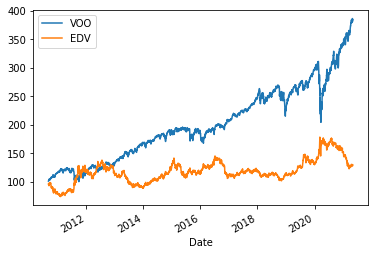

In [3]:
market = loader.get_market()
market.get_raw().plot()

In [4]:
print(market.get_first_date())
print(market.get_last_date())

2010-09-09 00:00:00
2021-05-04 00:00:00


<AxesSubplot:xlabel='Date'>

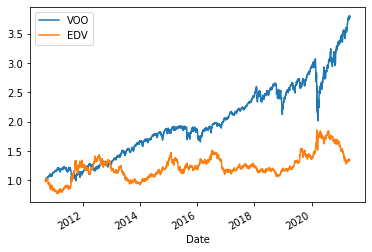

In [5]:
market.get_normalized_prices().plot()


<AxesSubplot:xlabel='Date'>

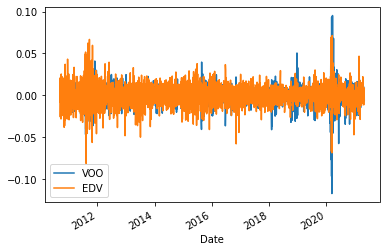

In [6]:
rate_of_change = market.get_rate_of_change()
rate_of_change.plot()


array([[<AxesSubplot:title={'center':'VOO'}>,
        <AxesSubplot:title={'center':'EDV'}>]], dtype=object)

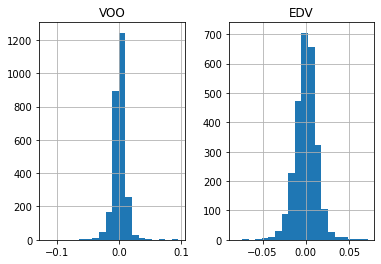

In [7]:
rate_of_change.hist(bins=20)

In [8]:
rate_of_change.describe()


,VOO,EDV
count,2680.000000,2680.000000
mean,0.000554,0.000197
std,0.010817,0.013060
min,-0.117388,-0.081443
25%,-0.003391,-0.007127
50%,0.000720,0.000605
75%,0.005513,0.007831
max,0.095364,0.071497


<AxesSubplot:xlabel='VOO', ylabel='EDV'>

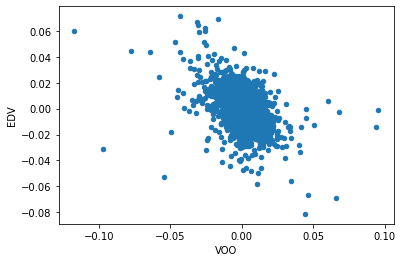

In [9]:
rate_of_change.plot.scatter(
    x = rate_of_change.columns[0],
    y = rate_of_change.columns[1]
)

In [10]:
rate_of_change.corr()

,VOO,EDV
VOO,1.000000,-0.422795
EDV,-0.422795,1.000000


In [11]:
years = market.resample(SamplingMethod.YEAR)
years.get_rate_of_change()

,VOO,EDV
Date,,
2013-12-31,0.297361,-0.234741
2014-12-31,0.113804,0.396192
2015-12-31,-0.007803,-0.086655
2016-12-31,0.098326,-0.033392
2017-12-31,0.194730,0.105739
2018-12-31,-0.063109,-0.062237
2019-12-31,0.287150,0.145602
2020-12-31,0.161900,0.171719
